### Importing modules 

In [1]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
from torch import optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

### Downloading dataset

In [4]:
train = datasets.MNIST('', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST('', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))                       

0it [00:00, ?it/s]

9920512it [00:02, 3690170.19it/s]                             


Extracting MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 53177.17it/s]                           
0it [00:00, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:01, 1290277.97it/s]                            
0it [00:00, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 27537.47it/s]            

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


### Show example of image

Label = 0


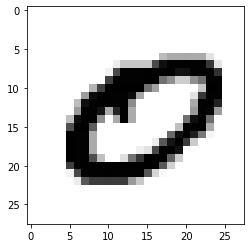

In [6]:
dataiter = iter(trainset)
images, labels = dataiter.next()
plt.imshow(images[0].view(28, 28), cmap='gray_r')
print('Label =', int(labels[0]))

### Load data to dataloader

In [5]:
trainset = DataLoader(batch_size=10, dataset=train, shuffle=True)
testset = DataLoader(batch_size=10, dataset=test, shuffle=True)

In [11]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_layer = nn.Linear(28*28, 68)
        self.hidden_layer = nn.Linear(68, 25)
        self.output_layer = nn.Linear(25, 10)
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.input_layer(x))
        x = F.relu(self.hidden_layer(x))
        x = F.log_softmax(self.output_layer(x), dim=1)
        return x

In [12]:
epochs = 10
model = NeuralNetwork()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

In [16]:
model.train()
for epoch in range(epochs):
    
    for batch_idx, (data, label) in enumerate(trainset):

        optimizer.zero_grad() 
        
        prediction = model(data)

        # Obliczanie kosztu
        loss = criterion(prediction, label)

        # Wsteczna propagacja błędu
        loss.backward()
        
        # Aktualizacja wag
        optimizer.step()
        
        if batch_idx * len(data) % 1000 == 0:
            print('Epoka: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch+1, batch_idx * len(data), len(trainset.dataset),
                    100. * batch_idx / len(trainset), loss.data.item()))


Epoka: 1 [0/60000 (0%)]	Loss: 0.407271
Epoka: 1 [1000/60000 (2%)]	Loss: 0.040329
Epoka: 1 [2000/60000 (3%)]	Loss: 0.020318
Epoka: 1 [3000/60000 (5%)]	Loss: 0.016455
Epoka: 1 [4000/60000 (7%)]	Loss: 0.008278
Epoka: 1 [5000/60000 (8%)]	Loss: 0.094834
Epoka: 1 [6000/60000 (10%)]	Loss: 0.001170
Epoka: 1 [7000/60000 (12%)]	Loss: 0.035709
Epoka: 1 [8000/60000 (13%)]	Loss: 0.007075
Epoka: 1 [9000/60000 (15%)]	Loss: 0.067156
Epoka: 1 [10000/60000 (17%)]	Loss: 0.002482
Epoka: 1 [11000/60000 (18%)]	Loss: 0.195908
Epoka: 1 [12000/60000 (20%)]	Loss: 0.002048
Epoka: 1 [13000/60000 (22%)]	Loss: 0.010025
Epoka: 1 [14000/60000 (23%)]	Loss: 0.007435
Epoka: 1 [15000/60000 (25%)]	Loss: 0.599855
Epoka: 1 [16000/60000 (27%)]	Loss: 0.000796
Epoka: 1 [17000/60000 (28%)]	Loss: 0.003234
Epoka: 1 [18000/60000 (30%)]	Loss: 0.029533
Epoka: 1 [19000/60000 (32%)]	Loss: 0.008621
Epoka: 1 [20000/60000 (33%)]	Loss: 0.000554
Epoka: 1 [21000/60000 (35%)]	Loss: 0.246560
Epoka: 1 [22000/60000 (37%)]	Loss: 0.011960
Epoka: 

Epoka: 4 [8000/60000 (13%)]	Loss: 0.000952
Epoka: 4 [9000/60000 (15%)]	Loss: 0.314721
Epoka: 4 [10000/60000 (17%)]	Loss: 0.008712
Epoka: 4 [11000/60000 (18%)]	Loss: 0.004941
Epoka: 4 [12000/60000 (20%)]	Loss: 0.029213
Epoka: 4 [13000/60000 (22%)]	Loss: 0.004136
Epoka: 4 [14000/60000 (23%)]	Loss: 0.003297
Epoka: 4 [15000/60000 (25%)]	Loss: 0.003891
Epoka: 4 [16000/60000 (27%)]	Loss: 0.002701
Epoka: 4 [17000/60000 (28%)]	Loss: 0.002626
Epoka: 4 [18000/60000 (30%)]	Loss: 0.011864
Epoka: 4 [19000/60000 (32%)]	Loss: 0.005401
Epoka: 4 [20000/60000 (33%)]	Loss: 0.001209
Epoka: 4 [21000/60000 (35%)]	Loss: 0.005737
Epoka: 4 [22000/60000 (37%)]	Loss: 0.001542
Epoka: 4 [23000/60000 (38%)]	Loss: 0.135160
Epoka: 4 [24000/60000 (40%)]	Loss: 0.551851
Epoka: 4 [25000/60000 (42%)]	Loss: 0.006838
Epoka: 4 [26000/60000 (43%)]	Loss: 0.031151
Epoka: 4 [27000/60000 (45%)]	Loss: 0.697017
Epoka: 4 [28000/60000 (47%)]	Loss: 0.458794
Epoka: 4 [29000/60000 (48%)]	Loss: 0.012854
Epoka: 4 [30000/60000 (50%)]	Loss:

Epoka: 7 [17000/60000 (28%)]	Loss: 0.001462
Epoka: 7 [18000/60000 (30%)]	Loss: 0.065076
Epoka: 7 [19000/60000 (32%)]	Loss: 0.039126
Epoka: 7 [20000/60000 (33%)]	Loss: 0.441078
Epoka: 7 [21000/60000 (35%)]	Loss: 0.002590
Epoka: 7 [22000/60000 (37%)]	Loss: 0.000036
Epoka: 7 [23000/60000 (38%)]	Loss: 0.001084
Epoka: 7 [24000/60000 (40%)]	Loss: 0.021372
Epoka: 7 [25000/60000 (42%)]	Loss: 0.003564
Epoka: 7 [26000/60000 (43%)]	Loss: 0.014247
Epoka: 7 [27000/60000 (45%)]	Loss: 0.001384
Epoka: 7 [28000/60000 (47%)]	Loss: 0.120780
Epoka: 7 [29000/60000 (48%)]	Loss: 0.016088
Epoka: 7 [30000/60000 (50%)]	Loss: 0.000015
Epoka: 7 [31000/60000 (52%)]	Loss: 0.001817
Epoka: 7 [32000/60000 (53%)]	Loss: 0.002784
Epoka: 7 [33000/60000 (55%)]	Loss: 0.001293
Epoka: 7 [34000/60000 (57%)]	Loss: 0.067167
Epoka: 7 [35000/60000 (58%)]	Loss: 0.004127
Epoka: 7 [36000/60000 (60%)]	Loss: 0.009047
Epoka: 7 [37000/60000 (62%)]	Loss: 0.004685
Epoka: 7 [38000/60000 (63%)]	Loss: 0.334974
Epoka: 7 [39000/60000 (65%)]	Los

Epoka: 10 [24000/60000 (40%)]	Loss: 0.000018
Epoka: 10 [25000/60000 (42%)]	Loss: 0.002097
Epoka: 10 [26000/60000 (43%)]	Loss: 0.000567
Epoka: 10 [27000/60000 (45%)]	Loss: 0.000056
Epoka: 10 [28000/60000 (47%)]	Loss: 0.001884
Epoka: 10 [29000/60000 (48%)]	Loss: 0.123737
Epoka: 10 [30000/60000 (50%)]	Loss: 0.002860
Epoka: 10 [31000/60000 (52%)]	Loss: 0.000075
Epoka: 10 [32000/60000 (53%)]	Loss: 0.000259
Epoka: 10 [33000/60000 (55%)]	Loss: 0.011194
Epoka: 10 [34000/60000 (57%)]	Loss: 0.000044
Epoka: 10 [35000/60000 (58%)]	Loss: 0.000932
Epoka: 10 [36000/60000 (60%)]	Loss: 0.014788
Epoka: 10 [37000/60000 (62%)]	Loss: 0.006927
Epoka: 10 [38000/60000 (63%)]	Loss: 0.000010
Epoka: 10 [39000/60000 (65%)]	Loss: 0.000653
Epoka: 10 [40000/60000 (67%)]	Loss: 0.000829
Epoka: 10 [41000/60000 (68%)]	Loss: 0.003602
Epoka: 10 [42000/60000 (70%)]	Loss: 0.002275
Epoka: 10 [43000/60000 (72%)]	Loss: 0.000525
Epoka: 10 [44000/60000 (73%)]	Loss: 0.028423
Epoka: 10 [45000/60000 (75%)]	Loss: 0.018539
Epoka: 10 

In [37]:
model.eval()
loss_vector = []
accurracy_vector = []

correct = 0
total = 0
val_loss = 0
with torch.no_grad():
    for data, label in testset:
        output = model(data)
        val_loss += criterion(output, label).data.item()
        predictied = output.data.max(1)[1]
        # print(predicted)
        # correct += predicted.eq(label.data).cpu().sum()
    
    val_loss /= len(trainset)
    loss_vector.append(val_loss)
    
    # accurracy = 100. * correct.to(torch.float32) / len(testset.dataset)
    # accurracy_vector.append(accurracy)
    
    # print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    #     val_loss, correct, len(validation_loader.dataset), accuracy))
    
    print(val_loss)

0.017303546931375157
